In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
G = 0.01720209895**2 # AU³ days⁻² Ms⁻¹
Mj = 9.54e-4    # Ms
m0 = 1
m1 = 1. * Mj

def n (a):
    return np.sqrt(G * (m0 + m1) / a**3)

name = "Salida.txt"

try:
    data = np.genfromtxt(name)
except ValueError as err:
    try:
        data = np.genfromtxt(name, skip_footer=1)
        print("Still writing...")
    except:
        raise ValueError (err)
print("Shape:", data.shape)

Shape: (3390, 7)


In [3]:
a1 = data[:, 0]
e1 = data[:, 1]
s1 = data[:, 2]
o1 = data[:, 3]
s0 = data[:, 4]
o0 = data[:, 5]
t  = data[:, 6] / 365.2563

n1 = n(a1)

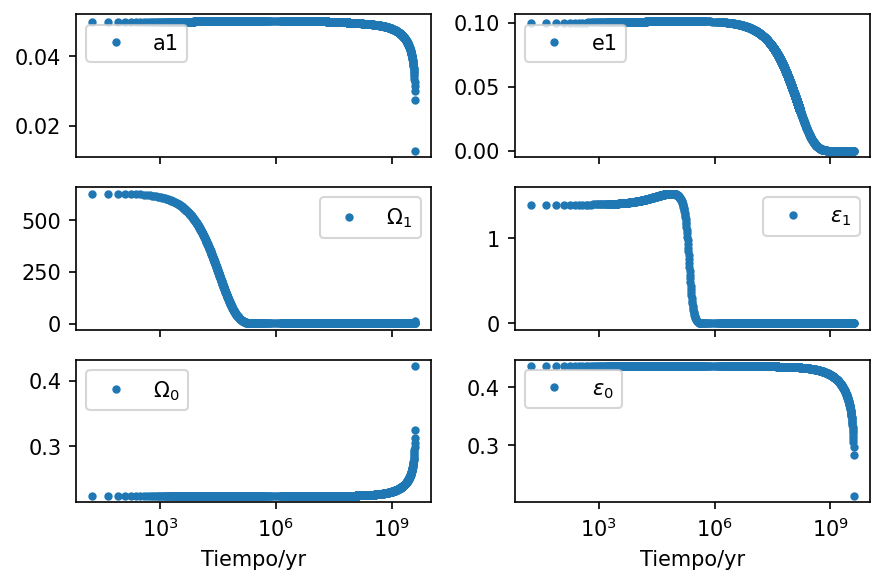

In [4]:
fig, axs = plt.subplots(3, 2, sharex=True, dpi=150)

axs[0,0].plot(t, a1, '.', label='a1')
axs[0,1].plot(t, e1, '.', label='e1')
axs[1,0].plot(t, s1, '.', label='$\Omega_1$')
axs[1,1].plot(t, o1, '.', label='$\epsilon_1$')
axs[2,0].plot(t, s0, '.', label='$\Omega_0$')
axs[2,1].plot(t, o0, '.', label='$\epsilon_0$')

for ax in axs.flat:
    ax.semilogx()
    ax.legend()

for ax in axs.flat[-2:]:
    ax.set_xlabel("Tiempo/yr")

fig.tight_layout()
plt.show()

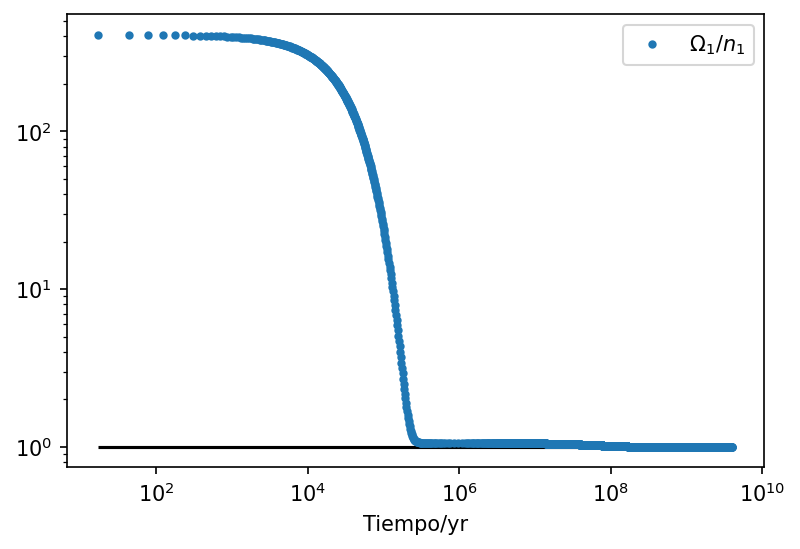

In [5]:
plt.figure(dpi=150)
plt.plot(t, s1 / n1, '.', label='$\Omega_1/n_1$')
plt.hlines(1, t[0], t[-1], 'k')
plt.semilogx()
plt.semilogy()
plt.xlabel("Tiempo/yr")
plt.legend()
plt.show()

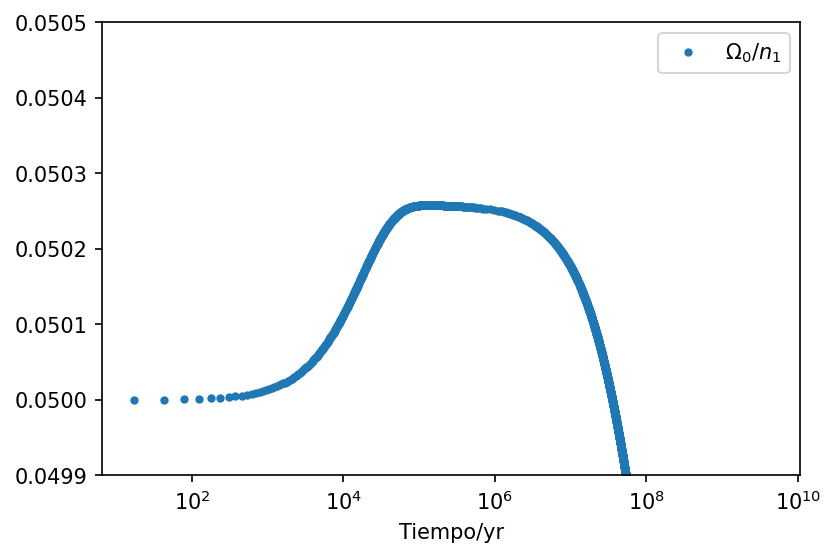

In [6]:
plt.figure(dpi=150)
plt.plot(t, a1, '.', label='$\Omega_0/n_1$')
plt.semilogx()
plt.ylim(0.0499, 0.0505)
plt.xlabel("Tiempo/yr")
plt.legend()
plt.show()